# Disaster Challenge Part 2  
Week10 – EM-DAT 災害データ分析

---

## 🎯 課題のゴール
- VS Code で Jupyter Notebook（.ipynb）を作成する  
- Markdown と Code Cells を使ってレポート形式にまとめる  
- 以下の 3 点を必ず含める  
  1. 自作の Function（関数）  
  2. 関数を使った Sample Output（サンプル結果）
  3. Loop（for 文）で複数グラフを生成する  

---

## 📁 使用データ
- *emdat.csv*（Week10 フォルダに保存）

---

## 🔍 分析の流れ
1. データ読み込み  
2. 自作関数の作成  
3. 関数によるサンプル出力  
4. for ループを使った複数可視化  
5. 結果のまとめ（考察）


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("emdat.csv")
df.head()


,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


In [23]:
def count_by_disaster(data, disaster_type):
    """
    指定した災害タイプの件数を年ごとにカウントする関数
    """
    subset = data[data["Disaster Type"] == disaster_type]
    yearly_count = subset.groupby("Year").size()
    return yearly_count


In [24]:
df.columns

Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Country', 'Subregion', 'Region', 'Latitude', 'Longitude', 'Start Year',
       'Total Deaths'],
      dtype='object')

In [25]:
def count_by_disaster(data, disaster_type):
    """
    指定した災害タイプの件数を年ごとにカウントする関数
    """
    subset = data[data["Disaster Type"] == disaster_type]
    yearly_count = subset.groupby("Start Year").size()
    return yearly_count


In [26]:
sample = count_by_disaster(df, "Flood")
sample.head()


Start Year
1900    1
1903    2
1909    1
1910    1
1911    1
dtype: int64

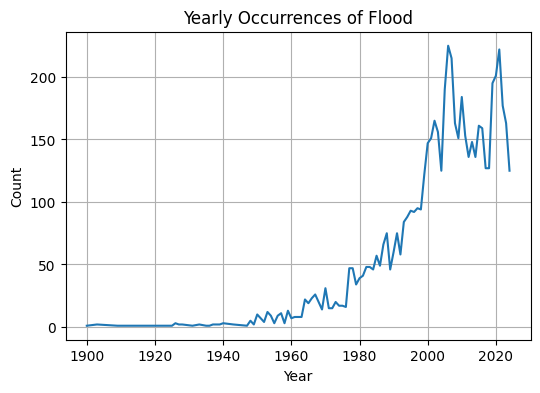

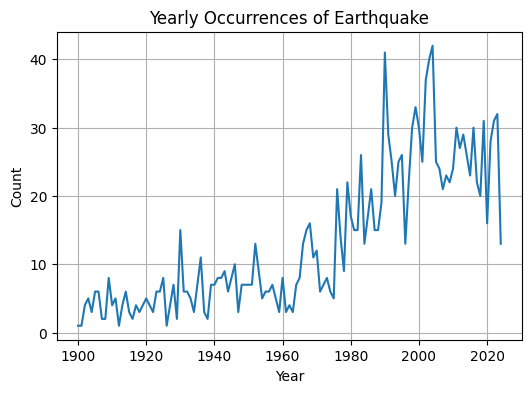

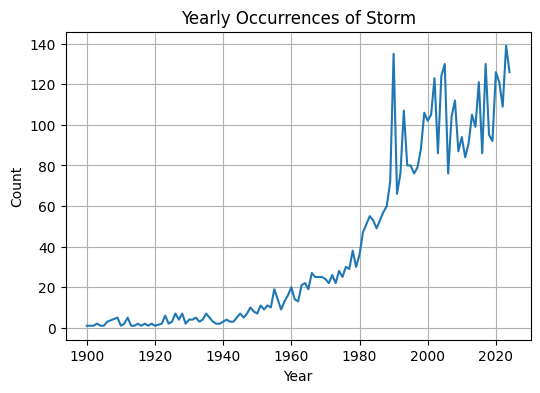

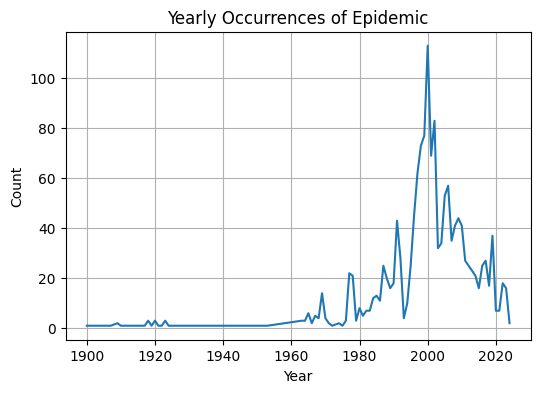

In [27]:
disasters = ["Flood", "Earthquake", "Storm", "Epidemic"]

for d in disasters:
    data_series = count_by_disaster(df, d)

    plt.figure(figsize=(6, 4))
    plt.plot(data_series.index, data_series.values)
    plt.title(f"Yearly Occurrences of {d}")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


## 📊 考察

- Flood や Storm は年ごとの変動が大きいことが確認できた。
- Earthquake は比較的件数が安定していた。
- Loop を使うことで、複数災害タイプの傾向をまとめて比較できた。
- 今回の関数化によって、災害タイプを変更しても簡単に分析できることを学んだ。

今回の分析を通して、データの構造理解・可視化・関数化の重要性を実感した。
